In [11]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
# re-size all the images to this
IMAGE_SIZE = [224, 224, 3]

In [13]:
#train_path = 'F:/VGG161/train'
train_path = 'F:/P-23-12/D1-24/train'

#valid_path = 'F:/VGG161/test'
valid_path = 'F:/P-23-12/D1-24/val'

test_path='F:/P-23-12/D1-24/test'

In [14]:
from keras import layers, models, optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

'''train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,preprocessing_function=preprocess_input)'''
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
   train_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=10,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=5,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=5,
    class_mode='binary')

Found 655 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [42]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
    epochs=20,
    validation_data=validation_generator,
    validation_steps=16)

print("Training Done")
model.save("vgg16_23_12.h5")

Epoch 1/20
20/20 [==============================] - 203s 10s/step - loss: 15.4008 - acc: 0.7750 - val_loss: 6.9452 - val_acc: 0.7750
Epoch 2/20
20/20 [==============================] - 204s 10s/step - loss: 6.7991 - acc: 0.7550 - val_loss: 1.0214 - val_acc: 0.8750
Epoch 3/20
20/20 [==============================] - 204s 10s/step - loss: 1.0546 - acc: 0.9000 - val_loss: 1.3713 - val_acc: 0.8500
Epoch 4/20
20/20 [==============================] - 204s 10s/step - loss: 1.6722 - acc: 0.8550 - val_loss: 1.5310 - val_acc: 0.8250
Epoch 5/20
20/20 [==============================] - 203s 10s/step - loss: 1.0651 - acc: 0.9100 - val_loss: 1.4796 - val_acc: 0.8250
Epoch 6/20
20/20 [==============================] - 197s 10s/step - loss: 1.0833 - acc: 0.8872 - val_loss: 1.7281 - val_acc: 0.8250
Epoch 7/20
20/20 [==============================] - 199s 10s/step - loss: 1.6498 - acc: 0.8513 - val_loss: 1.4221 - val_acc: 0.8375
Epoch 8/20
20/20 [==============================] - 197s 10s/step - loss: 0

In [43]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

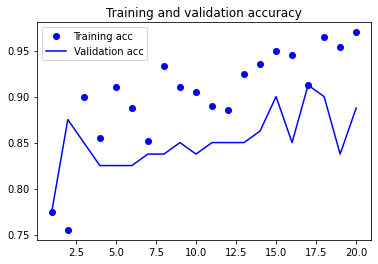

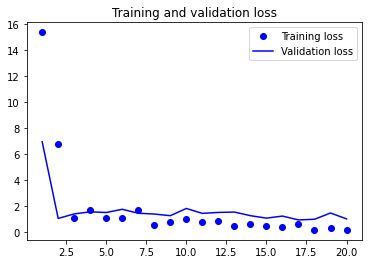

In [44]:
plot_accuracy_and_loss(history)

In [45]:
test_generator = test_datagen.flow_from_directory(
    "F:/P-23-12/D1-24/test",
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 83 images belonging to 2 classes.
20/20 [==============================] - 29s 1s/step - loss: 2.3652 - acc: 0.8750
test acc: 0.875


In [49]:
import tensorflow as tf

from keras.models import load_model
from keras.preprocessing import image
path='F:/P-23-12/1.png'

1
Malignant


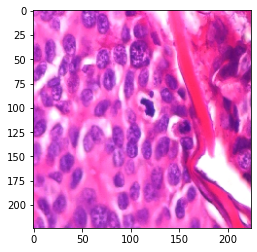

In [50]:
img = image.load_img(path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_23_12.h5")
 
x=saved_model.predict(img)
x=int(x)
print(x)

if x>0:
  print( "Malignant")
else:
  print("Benign")


In [9]:
import splitfolders

Copying files: 819 files [00:50, 16.20 files/s]
